**Task 3: Customer Churn Prediction (Bank Customers)**

Objective: 
* Identify customers who are likely to leave the bank.  

Importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

churndf = pd.read_csv('Churn_Modelling.csv')

**Dataset and its descriptions**

In [5]:
churndf

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
churndf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


First five rows in the dataset

In [4]:
churndf = pd.read_csv('Churn_Modelling.csv')
churndf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Number of rows and columns in the dataset

In [5]:
churndf.shape

(10000, 14)

* **Encoding categorical features**
* **Training model**
* **Analyzing feature importance to understand what influences churn** 

Features:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


Target Variable:


Exited
0    7963
1    2037
Name: count, dtype: int64

Features after Encoding:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,True,False


Training Samples: 8000
Test Samples: 2000
Model trained successfully.


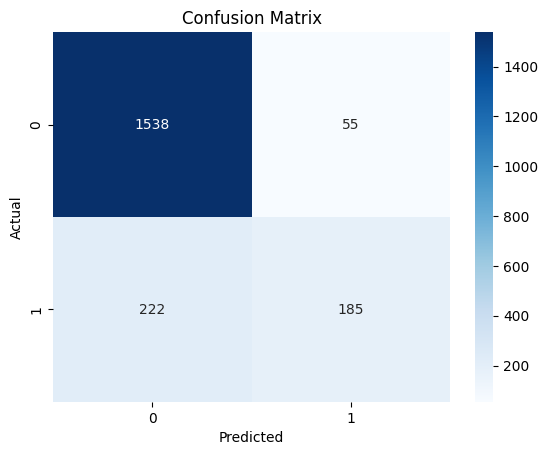

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



C:\Users\Shaheer Bilal\AppData\Local\Temp\ipykernel_8780\4126375243.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, orient='h', palette='viridis')


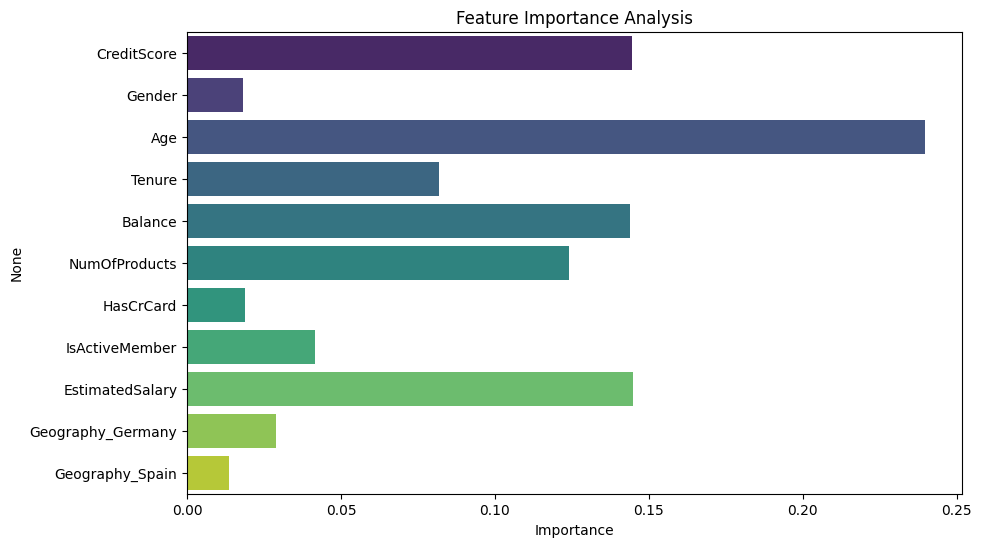

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Load dataset
churndf = pd.read_csv('Churn_Modelling.csv')

# Cleaning and preparing the dataset
# Drop irrelevant columns
X = churndf.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis=1)
y = churndf['Exited']

print("Features:")
display(X)

print("Target Variable:")
display(y.value_counts())

# Encoding categorical features
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# One-hot encoding
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)

print("Features after Encoding:")
display(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Classification Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

print("Model trained successfully.")

# Evaluating Model
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Analyze Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Plot Feature Importances
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, orient='h', palette='viridis')
plt.xlabel('Importance')
plt.title('Feature Importance Analysis')
plt.show()



**Explanation of the output:**

1. We start by importing required libraries and load the dataset.

2. We clean and prepare the dataset. After dropping irrelevant columns, only meaningful numeric and categorical features remain. Our target variable is customers who are likely to leave a bank. The dataset of both features and target variable are displayed above. 

3. **Encoding output** 

We encode categorical features: Gender and Geography.

* Gender will be numeric (0 for female and 1 for male).
* Geography will show one-hot encoded columns like: Geography_Germany, Geography_Spain (France is dropped to avoid multicollinearity.)

4. **Class distribution(Target variable)**

The output of target variable is:
*  7963 customers stayed - 0 (Not churned)
*  2037 customers left - 1 (Churned)

5. **Confusion Matrix**

After training the model and predicting:
* True Positives (185): Customers correctly predicted to leave.
* True Negatives (1538): Customers correctly predicted to stay.
* False Positives (55): Predicted leave, but stayed.
* False Negatives (222): Predicted stay, but actually left.

6. **Classification Report**

* Accuracy (~86%) means the model predicts customer behavior correctly about 86% of the time.
* Precision & recall for churned customers (label 1) are usually lower due to class imbalance.

7. **Feature Importance Plot**

Shows which features matter most:
* Age
* Balance
* Number of Products
* IsActiveMember
* Geography_Germany
* EstimatedSalary

Longer bars mean more influence on churn predictions.

**Summary:**

* Age and Balance often have the highest impact on whether a customer churns.
* Geography and IsActiveMember also play important roles.
* Model struggles slightly to detect customers who actually churn due to class imbalance.